In [1]:
import requests
import pandas as pd
from pathlib import Path
from investment_tools.fmp import FinancialData, ManualAnalysis, Company
from matplotlib import pyplot as plt
import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr
from IPython.display import clear_output

key_path = Path().home()/'desktop'/'FinancialModellingPrep_API.txt'
with open(key_path) as file:
    api_key = file.read()
    

yf.pdr_override()

Financial statements had different lengths...
Financial statement lengths are BS: 20, IS:20, CFS:20, Ratios:20
[*********************100%***********************]  1 of 1 completed
Path already exists. Overwriting saved data.
There were 5/20 values in ebitdaratio that exceed the 0.05 error tolerance.
There were 0/20 values in grossProfitRatio that exceed the 0.05 error tolerance.
There were 17/20 values in operatingIncomeRatio that exceed the 0.05 error tolerance.
There were 17/20 values in incomeBeforeTaxRatio that exceed the 0.05 error tolerance.
There were 16/20 values in netIncomeRatio that exceed the 0.05 error tolerance.
There were 0/20 values in eps that exceed the 0.05 error tolerance.
There were 0/20 values in grossProfitMargin that exceed the 0.05 error tolerance.
There were 0/20 values in operatingProfitMargin that exceed the 0.05 error tolerance.
There were 0/20 values in currentRatio that exceed the 0.05 error tolerance.
There were 0/20 values in returnOnEquity that exceed 

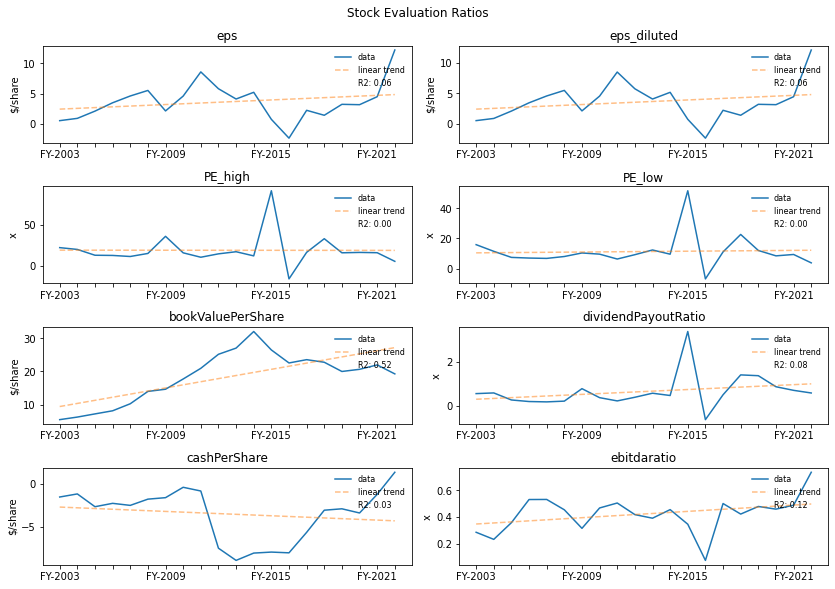

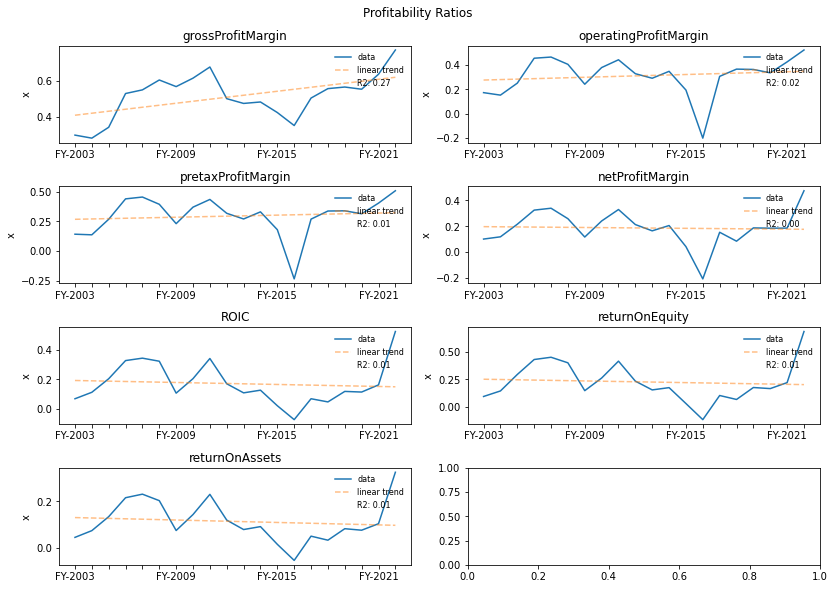

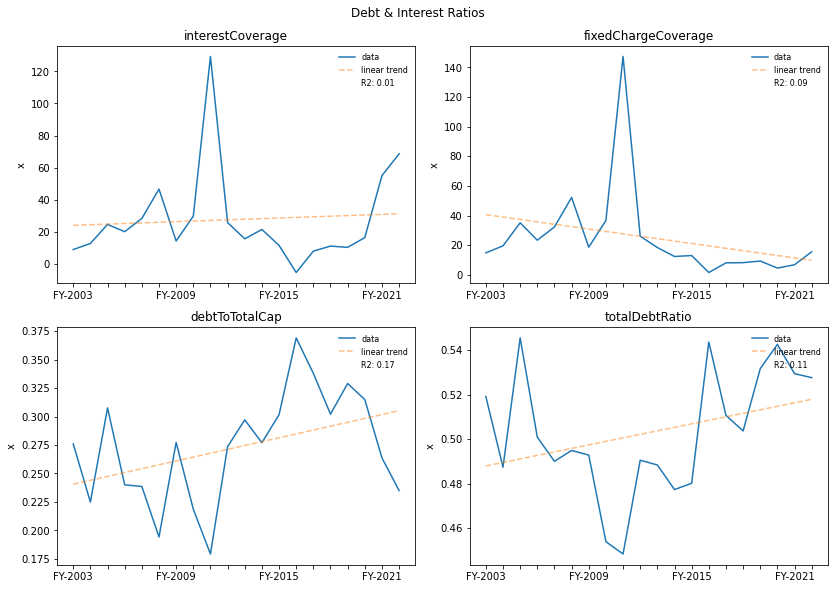

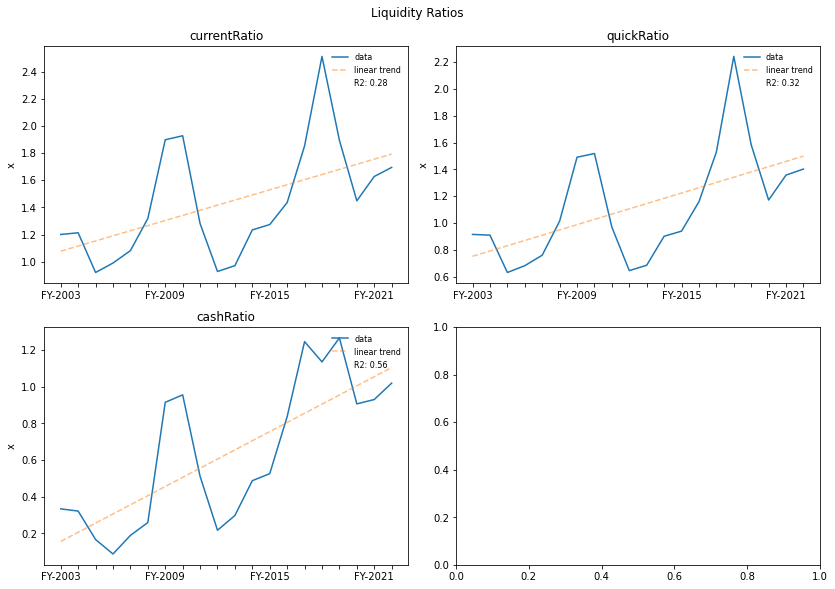

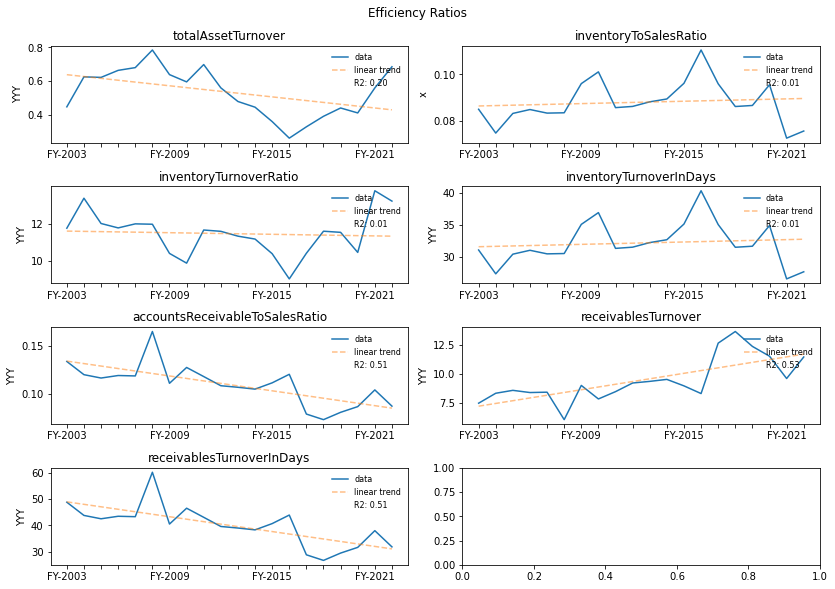

In [2]:
a = Company('BHP', api_key=api_key, period='annual', data='online', limit=20,
           verbose=True)
#ZTS 

In [4]:
a.scores

{'eps_growth': {'score': 4, 'strength': 0},
 'returnOnEquity_growth': {'score': 1, 'strength': 0},
 'ROIC_growth': {'score': 2, 'strength': 0},
 'returnOnAssets_growth': {'score': 2, 'strength': 0},
 'debtToTotalCap_growth': {'score': 0, 'strength': 0},
 'totalDebtRatio_growth': {'score': 0, 'strength': 0}}

In [3]:
def tradable_tickers():
    url = f'https://financialmodelingprep.com/api/v3/available-traded/list?apikey={api_key}'
    data = requests.get(url)
    data = sort_json_ticker_data(data.json())
    return data

def sort_json_ticker_data(data):
    return_dict = dict()
    for dct in data:
        if dct['exchange'] not in return_dict.keys():
            return_dict[dct['exchange']] = [dct['symbol']]
        else:
            return_dict[dct['exchange']].append(dct['symbol'])

    return return_dict

ticker_list = tradable_tickers()

In [4]:
ticker_list.keys()

dict_keys(['Tokyo', 'London Stock Exchange', 'Other OTC', 'XETRA', 'New York Stock Exchange', 'Nasdaq', 'Stuttgart', 'São Paulo', 'HKSE', 'NASDAQ Global Market', 'Tel Aviv', 'Australian Securities Exchange', 'Taipei Exchange', 'Vienna', 'NASDAQ Capital Market', 'Thailand', 'Shanghai', 'Milan', 'Paris', 'Toronto Stock Exchange', 'BATS', 'New York Stock Exchange Arca', 'National Stock Exchange of India', 'Istanbul Stock Exchange', 'Athens', 'American Stock Exchange', 'Jakarta Stock Exchange', 'Stockholm Stock Exchange', 'TSXV', 'Johannesburg', 'Taiwan', 'NASDAQ Global Select', 'Warsaw Stock Exchange', 'Swiss Exchange', 'Frankfurt', 'Canadian Sec', 'SES', 'KSE', 'KOSDAQ', 'Brussels', 'IOB', 'Amsterdam', 'Copenhagen', 'Shenzhen', 'YHD', 'Saudi', 'NEO', 'Irish', 'Kuala Lumpur', 'Qatar', '', 'Helsinki', 'Madrid Stock Exchange', 'Dubai', 'Oslo Stock Exchange', 'Mexico', 'Munich', 'Lisbon', 'NZSE', 'Santiago', 'Budapest', 'Berlin', 'BSE', 'Iceland', 'Nasdaq Capital Market', 'Aquis AQSE', 'FTSE

In [4]:
ticker_scan = (ticker_list['New York Stock Exchange'][100:110])

Ticker KEY-PJ
Financial statements had different lengths...
Financial statement lengths are BS: 20, IS:20, CFS:20, Ratios:4
Financial statement lengths are now each: 4
[*********************100%***********************]  1 of 1 completed
Path already exists. Overwriting saved data.


KeyboardInterrupt: 

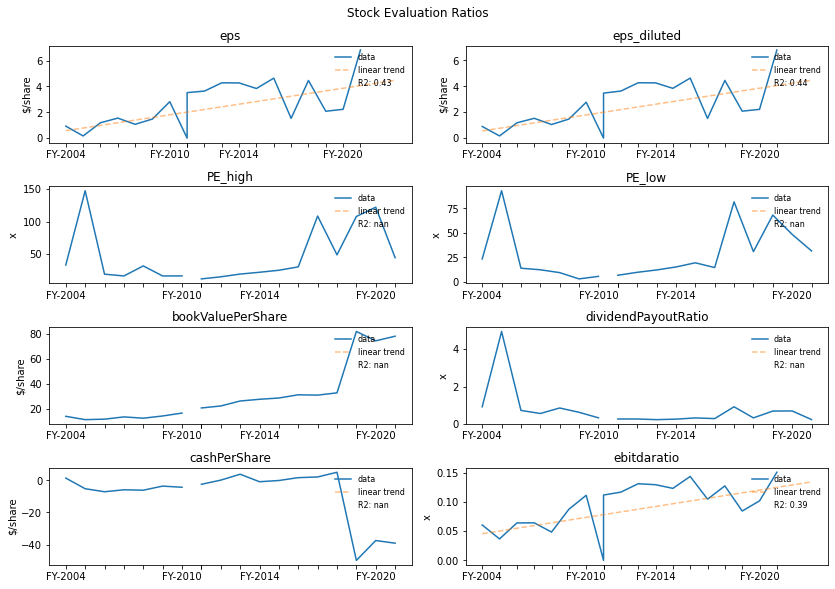

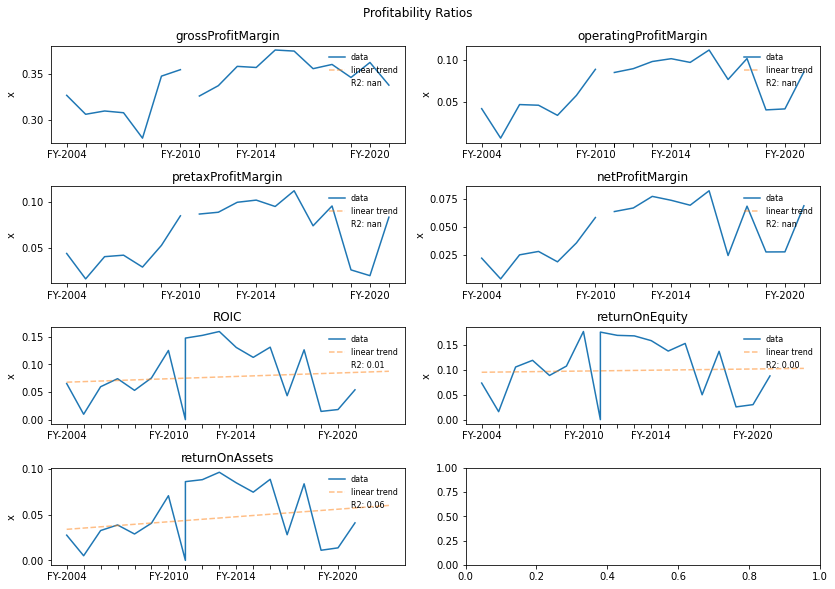

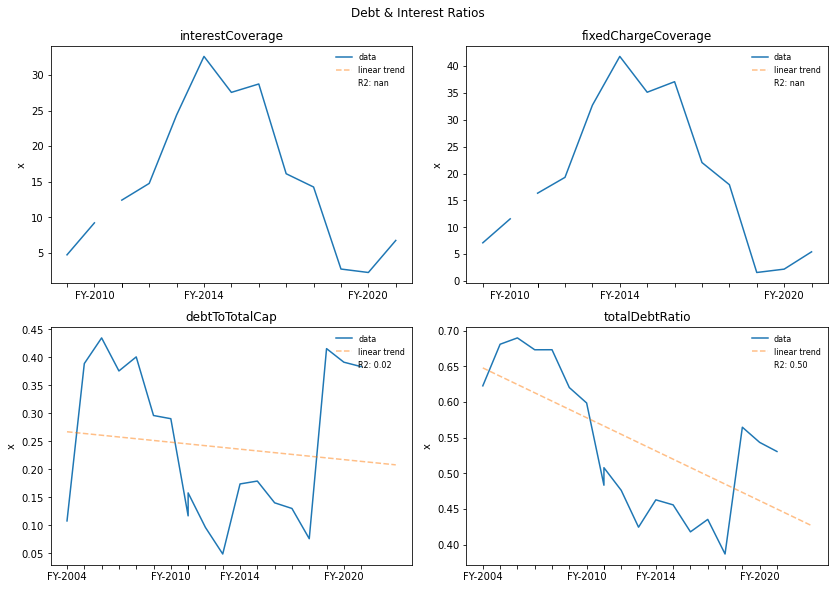

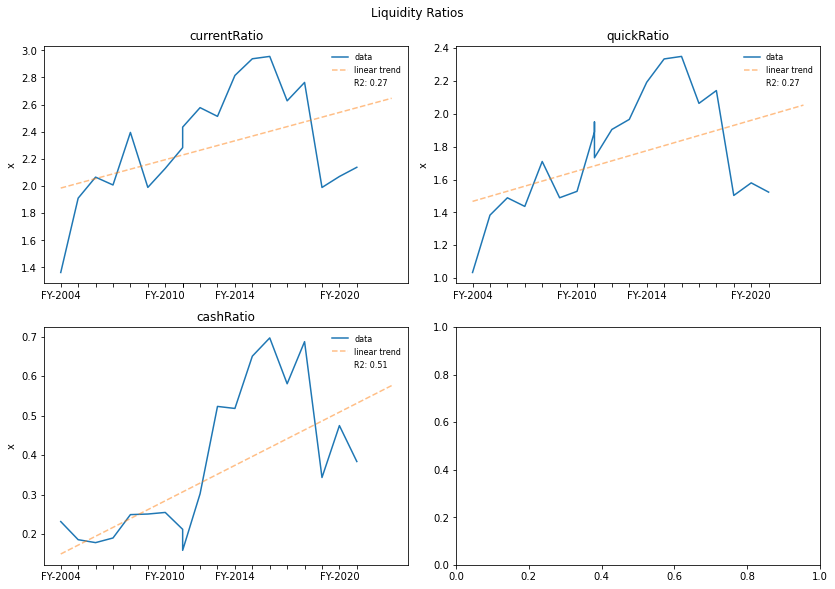

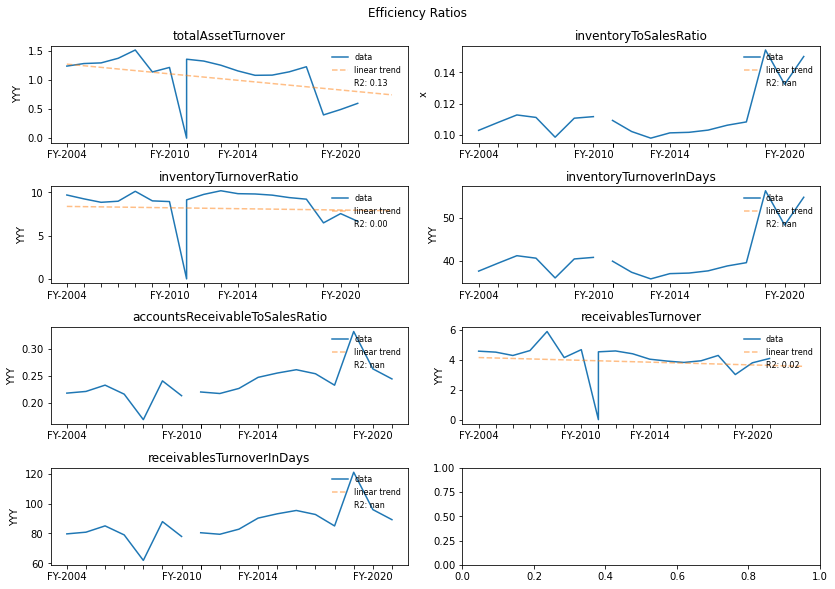

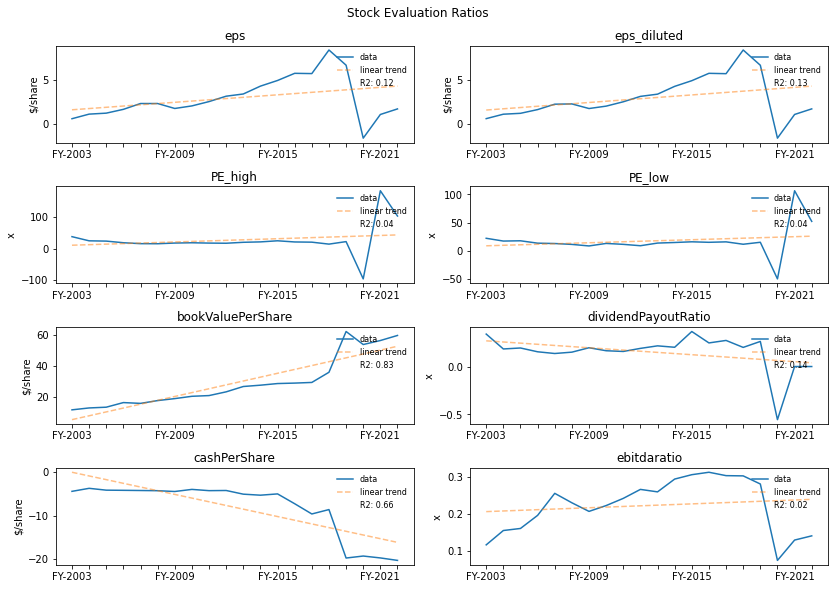

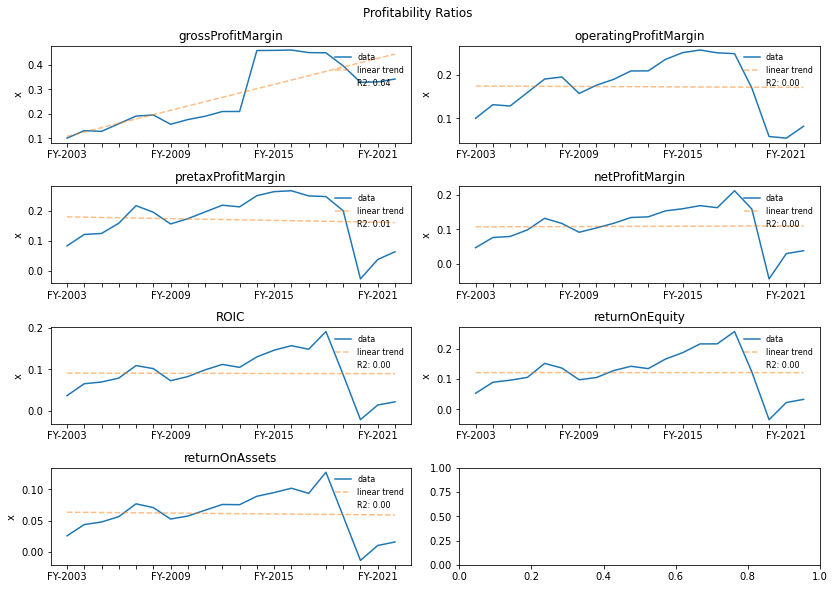

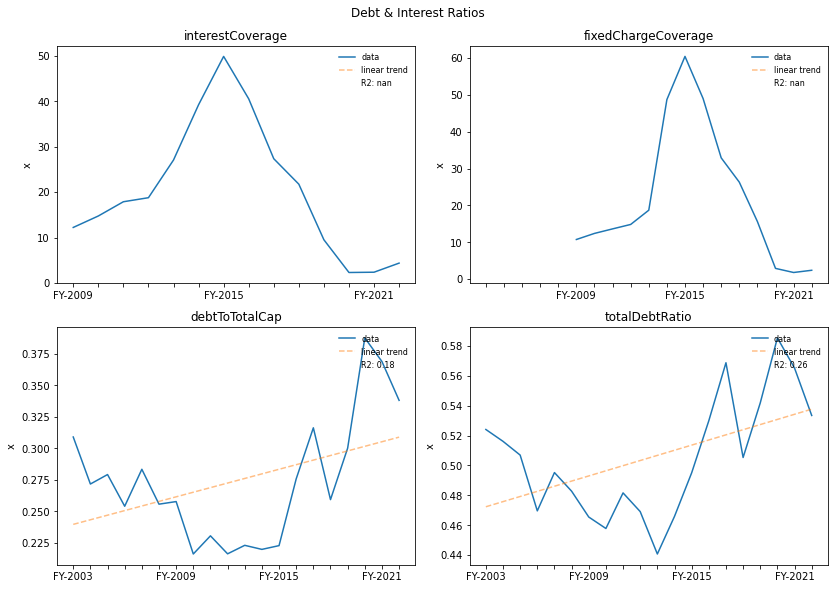

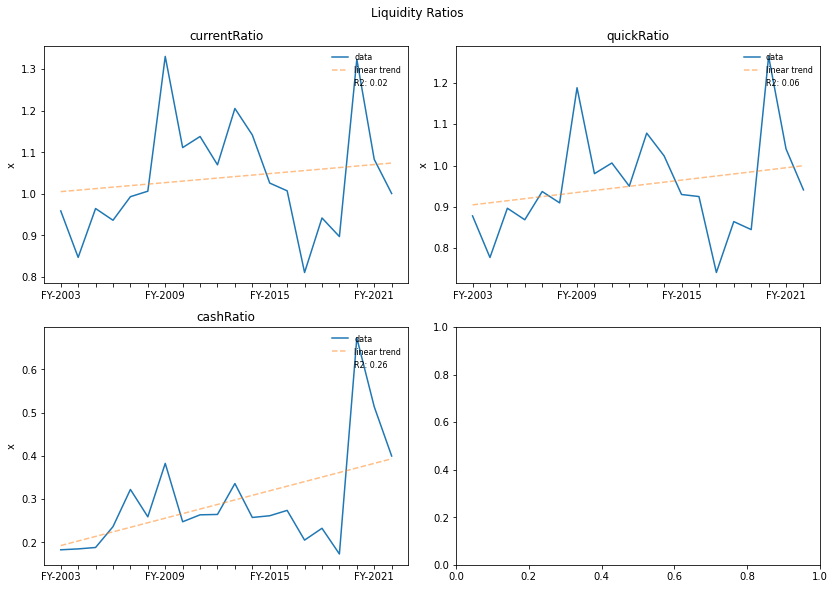

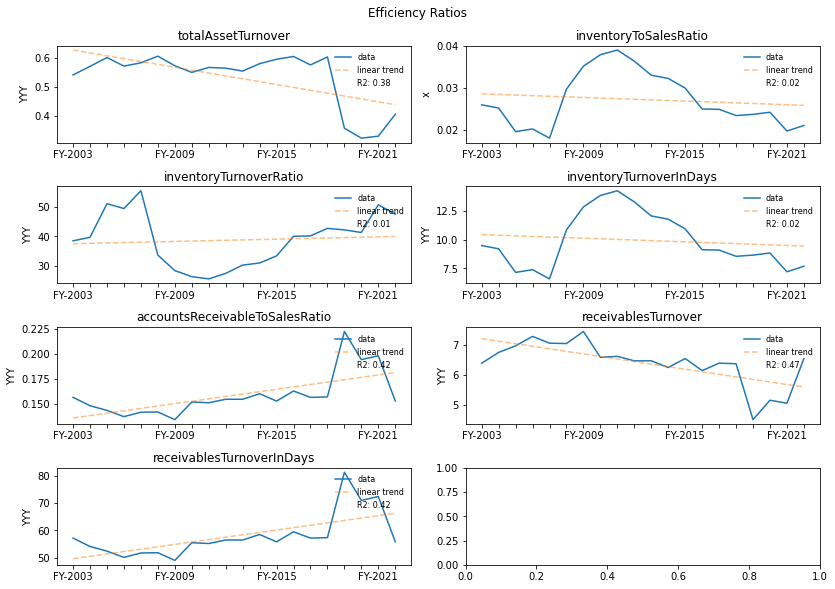

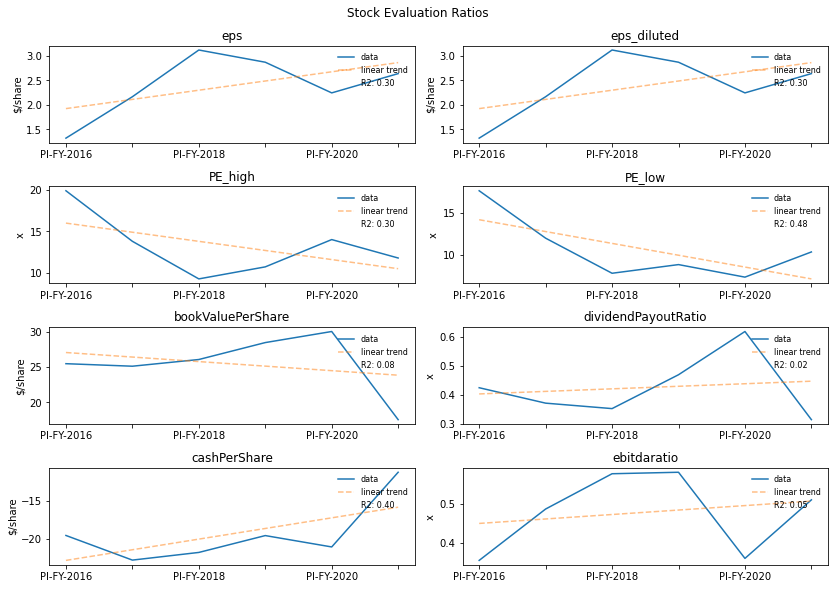

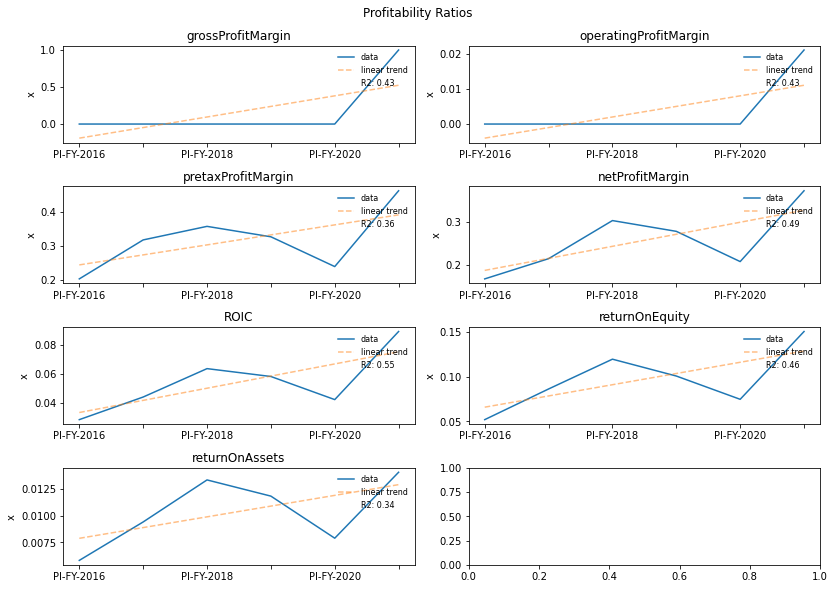

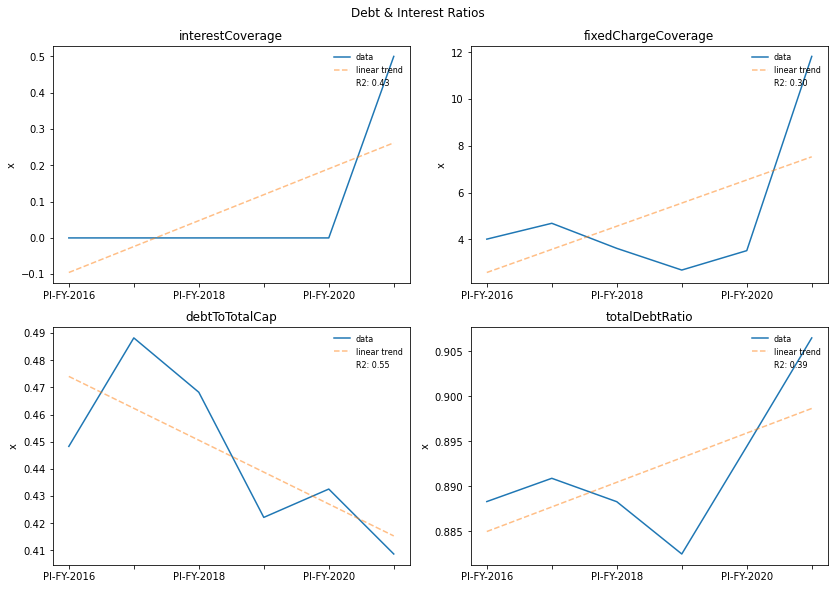

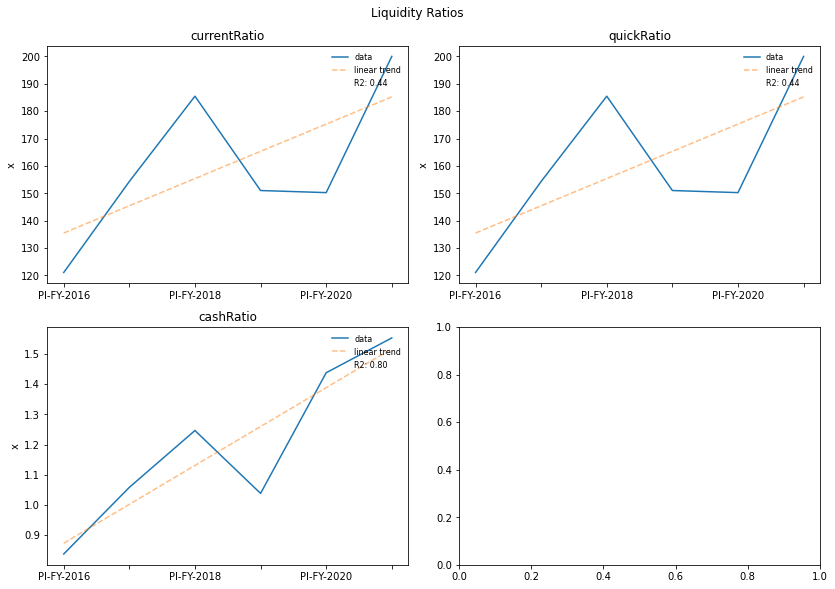

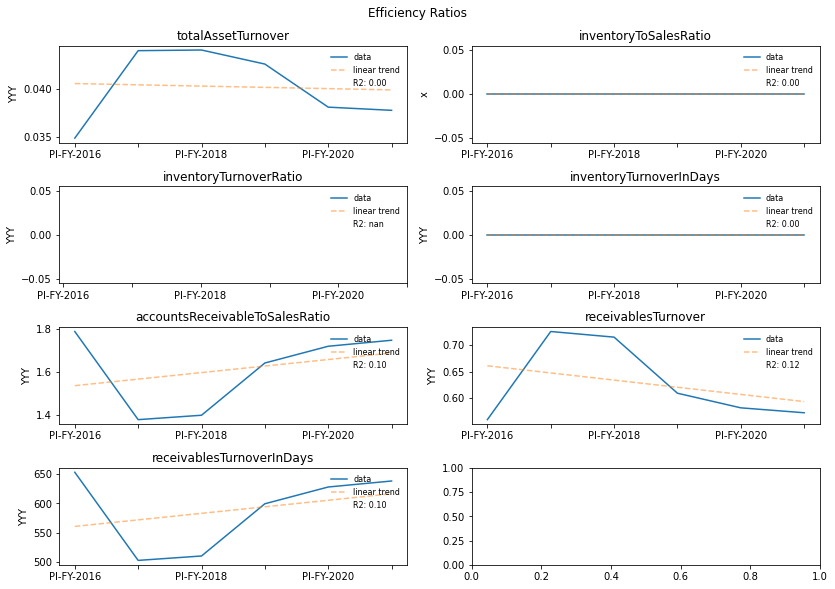

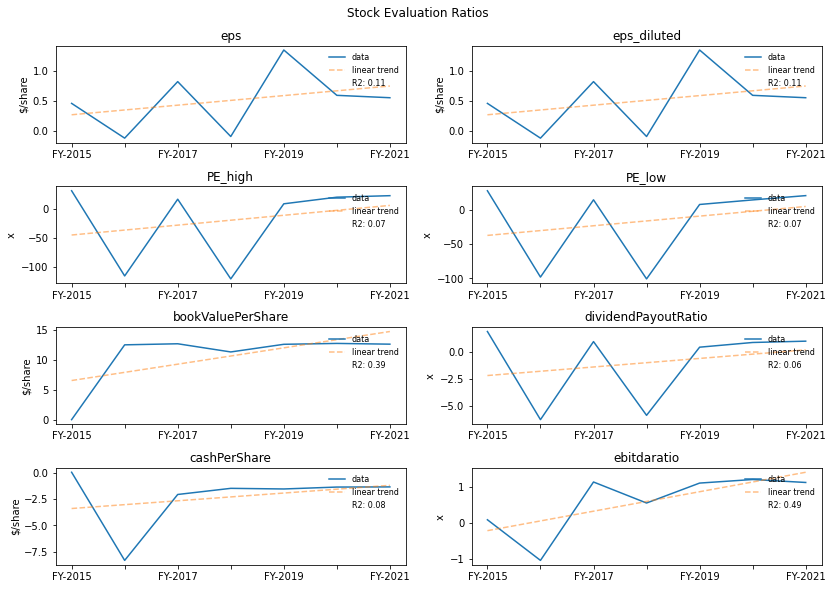

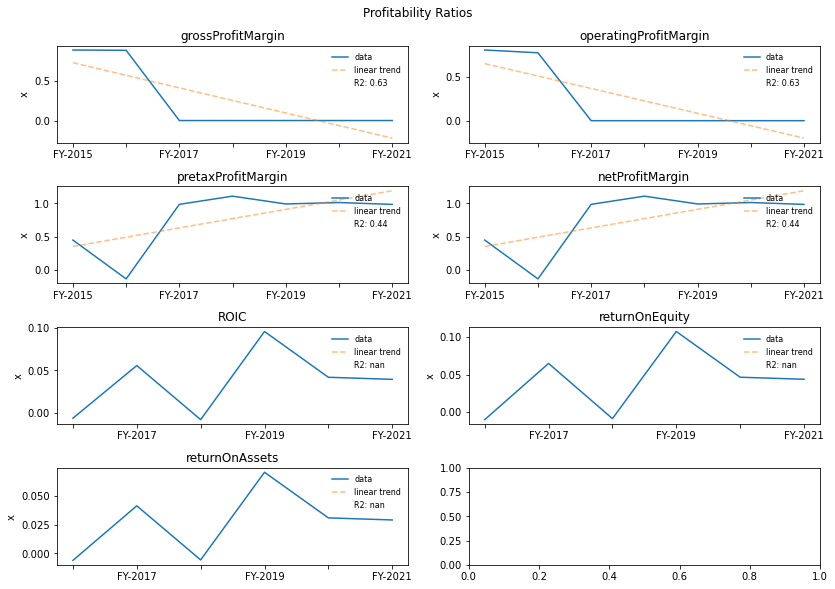

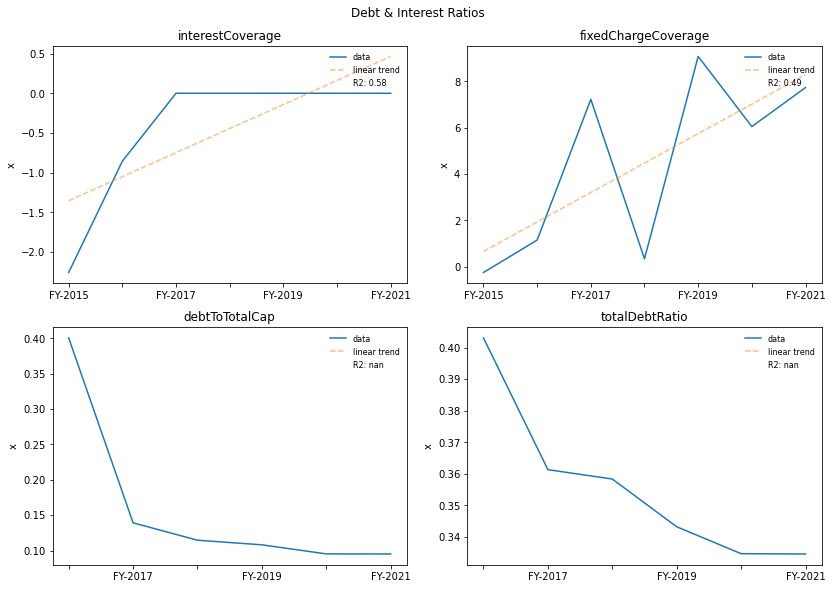

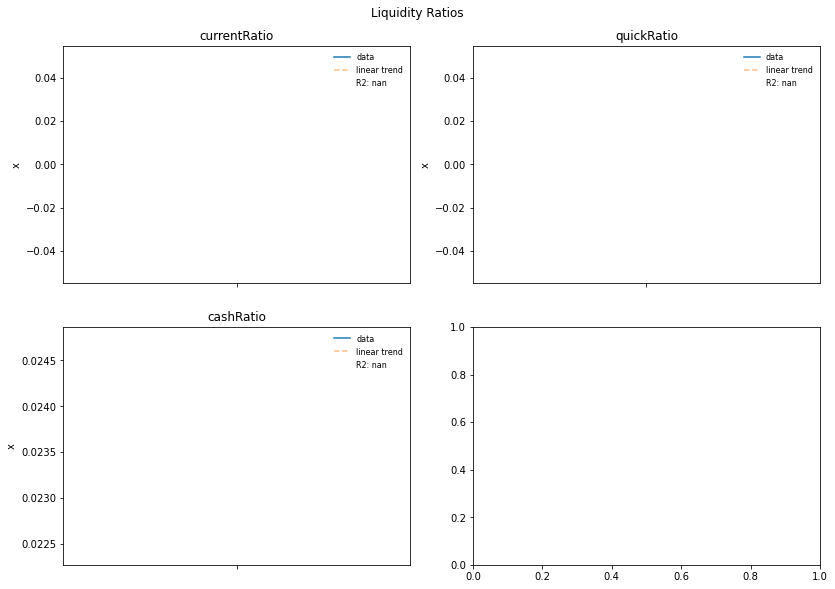

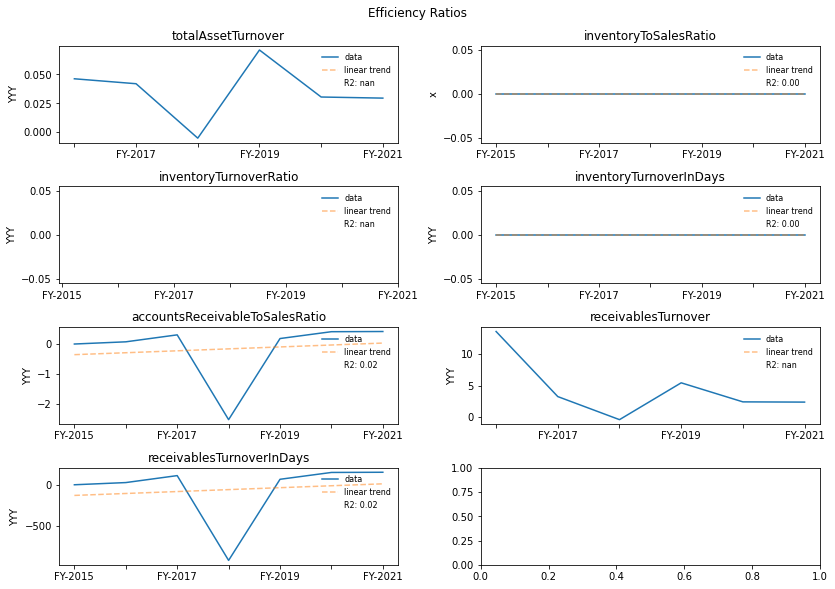

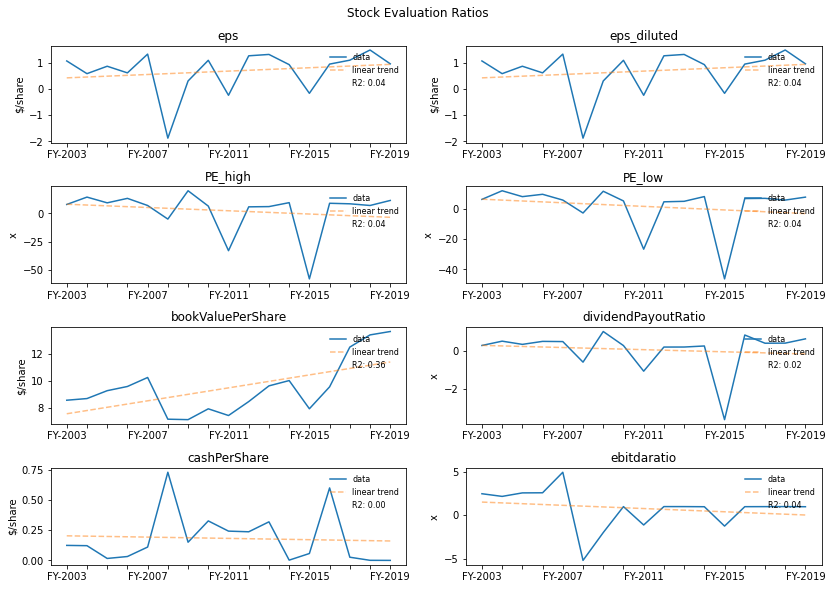

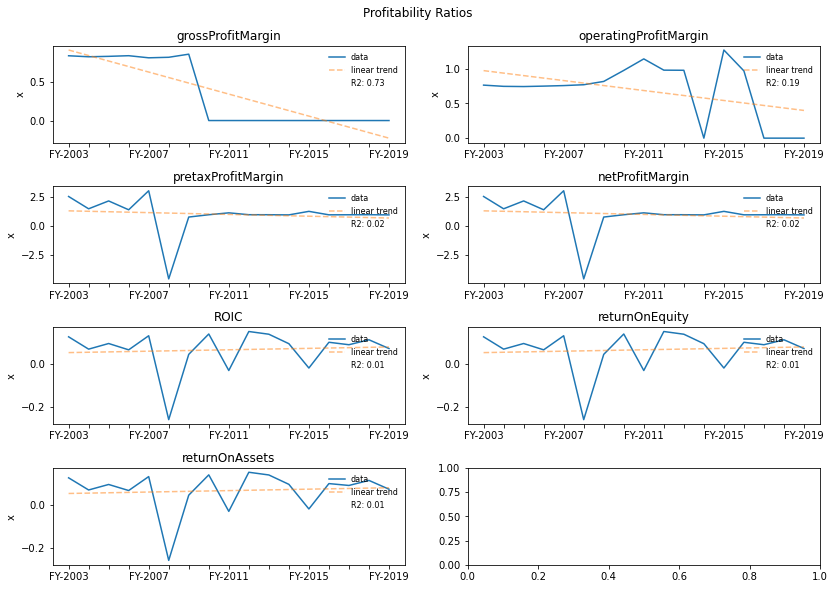

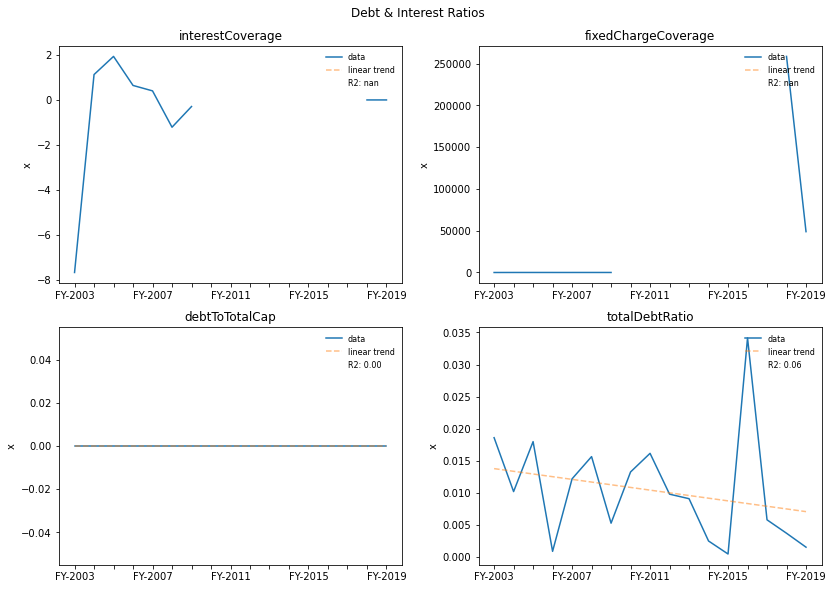

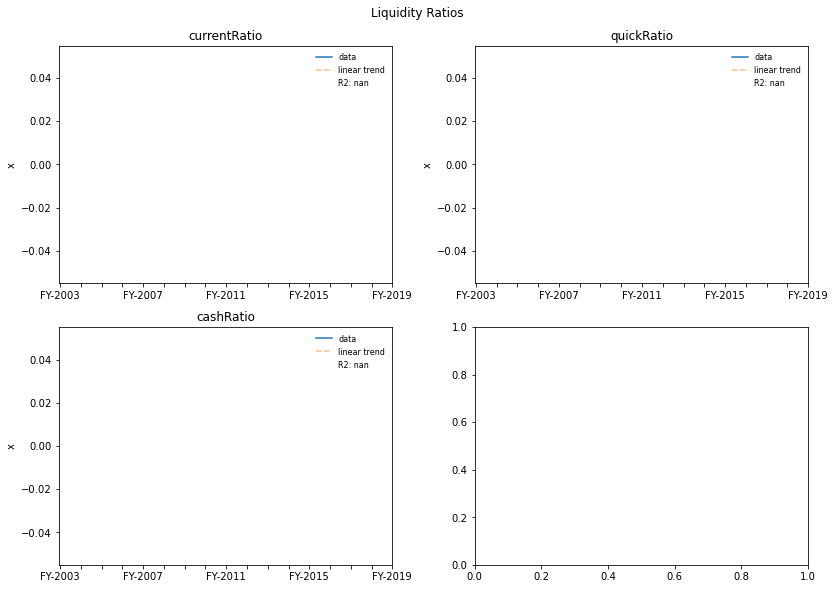

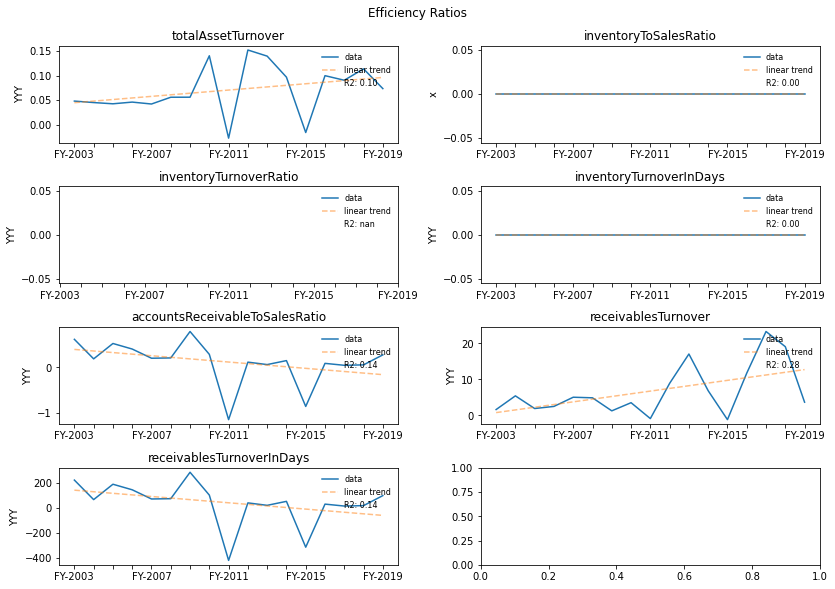

In [9]:
for ticker in ticker_scan:
    try:
        clear_output()
        print(f"Ticker {ticker}")
        Company(ticker, api_key)
    except AssertionError:
        pass

        


In [7]:
ticker_scan.index('PERF-WT')

0

In [18]:
company = 'RONI-UN'
period='annual'
limit=20
balance_sheets = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?period={period}&limit={limit}&apikey={api_key}')

In [19]:
balance_sheets.json()

[{'date': '2021-12-31',
  'symbol': 'RONI-UN',
  'reportedCurrency': 'USD',
  'cik': '0001845437',
  'fillingDate': '2022-03-30',
  'acceptedDate': '2022-03-30 16:00:54',
  'calendarYear': '2021',
  'period': 'FY',
  'cashAndCashEquivalents': 2570409,
  'shortTermInvestments': 0,
  'cashAndShortTermInvestments': 2570409,
  'netReceivables': 7960,
  'inventory': 0,
  'otherCurrentAssets': 746720,
  'totalCurrentAssets': 3325089,
  'propertyPlantEquipmentNet': 0,
  'goodwill': 0,
  'intangibleAssets': 0,
  'goodwillAndIntangibleAssets': 0,
  'longTermInvestments': 0,
  'taxAssets': 0,
  'otherNonCurrentAssets': 345044341,
  'totalNonCurrentAssets': 345044341,
  'otherAssets': 0,
  'totalAssets': 348369430,
  'accountPayables': 143405,
  'shortTermDebt': 0,
  'taxPayables': 0,
  'deferredRevenue': 0,
  'otherCurrentLiabilities': 375918,
  'totalCurrentLiabilities': 519323,
  'longTermDebt': 0,
  'deferredRevenueNonCurrent': 0,
  'deferredTaxLiabilitiesNonCurrent': 0,
  'otherNonCurrentLia

In [17]:
ticker_scan.index('RONI-UN')

2

In [13]:
y = a.metrics['ROIC_growth'].copy().dropna()
x = range(len(y))

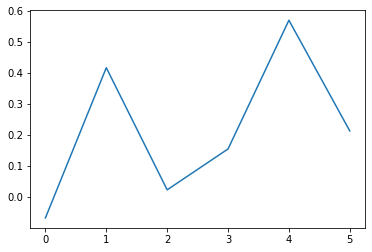

In [14]:
plt.plot(x,y)

In [9]:
from scipy.stats import linregress
xx, yy, r, _, _ = linregress(x, y)

In [10]:
r**2

0.30657525911175687

In [11]:
r

0.5536923867200604

In [4]:
import datetime